# Imports

In [38]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso , Ridge
# gridsearchcv is used to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Topics

In [39]:
# let's just land some fake data with features 
x = np.random.rand(1000, 5)
y = 3*x[:, 0] + 2*x[:, 1] + 4*x[:, 2] + 5*x[:, 3] + 6*x[:, 4] + np.random.randn(1000)

# split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

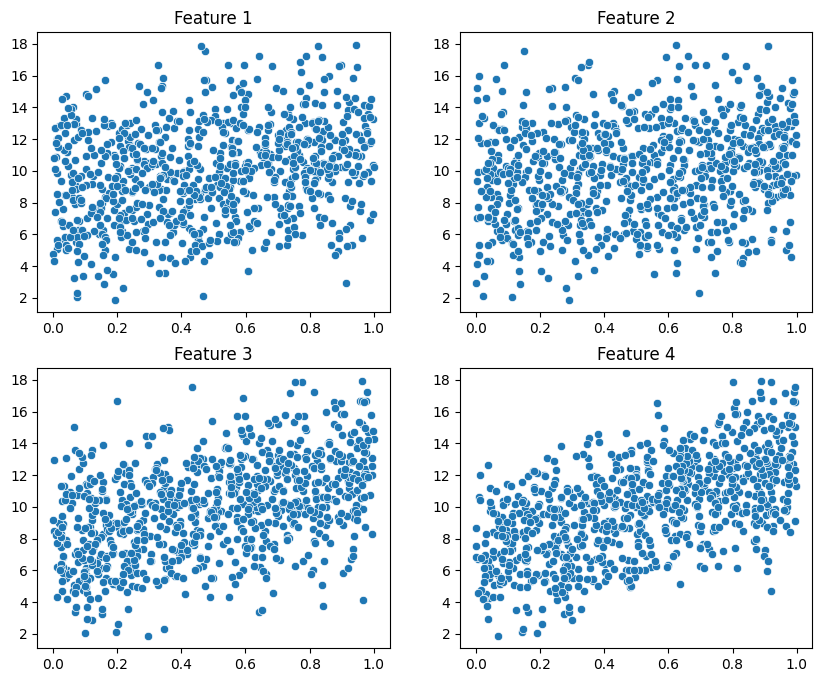

In [40]:
# plot each feature 
import seaborn as sns

# create subplots for each feature 
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for i in range(4):
    sns.scatterplot(x=x_train[:, i], y=y_train, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(f"Feature {i+1}")
plt.show()

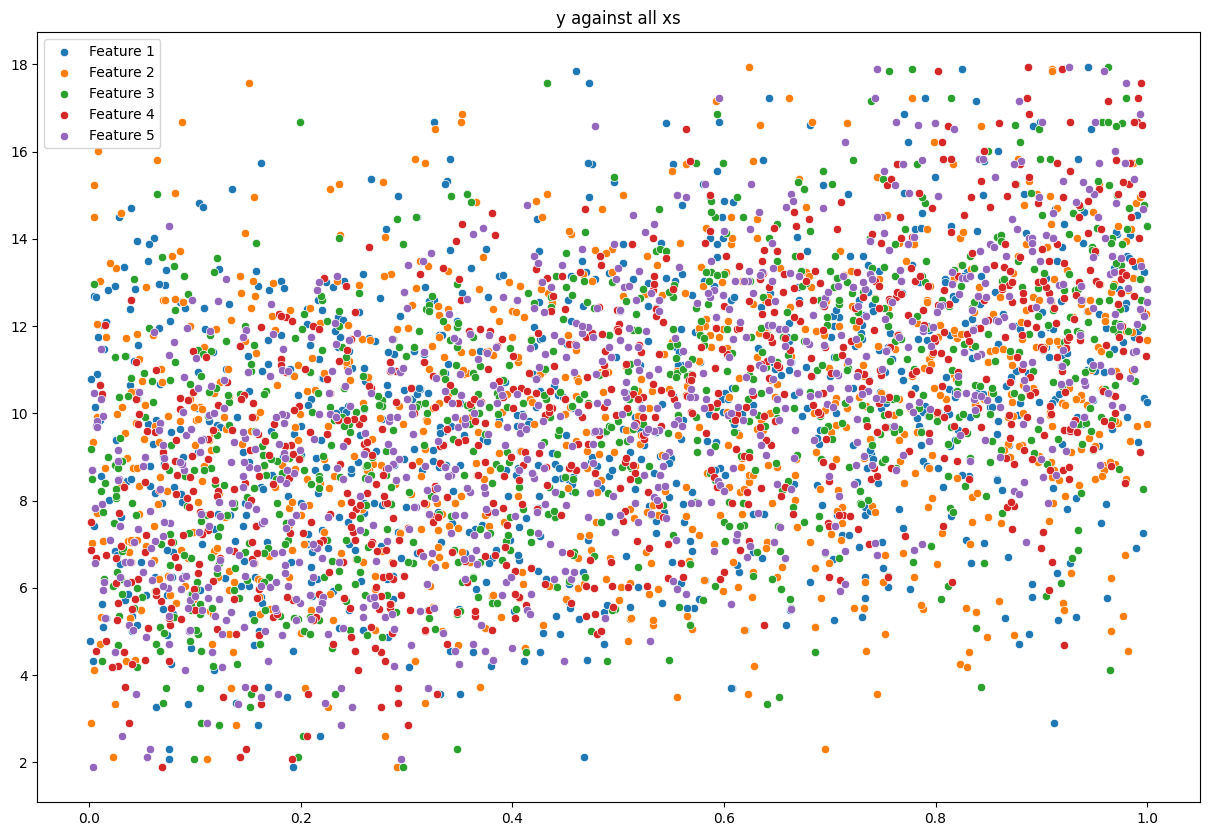

In [41]:
#a plot for y against all xs , with legends
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for i in range(5):
    sns.scatterplot(x=x_train[:, i], y=y_train, label=f"Feature {i+1}")
ax.set_title("y against all xs")
plt.legend()
plt.show()


## Regularization Techniques

## Lasso 

### Before GridSearchCV

In [42]:
Lasso = Lasso()

Lasso.fit(x_train, y_train)

print(f"Lasso MSE before hyperparameter tuning: {mean_squared_error(y_test, Lasso.predict(x_test))}")


Lasso MSE before hyperparameter tuning: 8.42524995175567


### After GridSearchCV

In [43]:
parameters = {'alpha': [1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30]}
lasso_regressor = GridSearchCV(Lasso, parameters, scoring='neg_mean_squared_error', cv=5)
# print(f"Best Lambda is {lasso_regressor.best_params_}")
lasso_regressor.fit(x_train, y_train)
print(f"Lasso MSE Score: {mean_squared_error(y_test, lasso_regressor.predict(x_test))}")

Lasso MSE Score: 1.069147331395272


## Ridge

### Before GridSearchCV

In [44]:
Ridge = Ridge()

# before using gridsearch 
Ridge.fit(x_train, y_train)

ridge_score = mean_squared_error(y_test, Ridge.predict(x_test))

print(f"Ridge MSE before hyperparameter tuning: {ridge_score}")



Ridge MSE before hyperparameter tuning: 1.0625714242006987


### After GridSearchCV

In [45]:
parameters = {'alpha': [1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30]}

ridge_regressor = GridSearchCV(Ridge, parameters, scoring='neg_mean_squared_error', cv=5)
# print(f"Best Lambda is {ridge_regressor.best_params_}")
ridge_regressor.fit(x_train, y_train)

ridge_score = mean_squared_error(y_test, ridge_regressor.predict(x_test))

print(f"Ridge Score: {ridge_score}")


Ridge Score: 1.0691473471812827
